In [1]:
import sys
sys.path.append('../../')
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style='ticks', context='paper',
                               rc={'font.size': 6, 
                                   'axes.titlesize': 7,
                                   'axes.labelsize': 7,
                                   'axes.labelpad': 2,
                                   'xtick.labelsize': 5,
                                   'ytick.labelsize': 5,
                                   'legend.fontsize' : 5.5,
                                   'legend.title_fontsize' : 7,
                                   'legend.markerscale': 0.5,
                                   'axes.spines.top': False,
                                   'axes.spines.right': False,
                                   'axes.linewidth': 0.4,
                                   'xtick.major.width': 0.4,
                                   'ytick.major.width': 0.4,
                                   'xtick.major.size': 2.5,
                                   'ytick.major.size': 2.5,
                                   'xtick.minor.size': 1.5,
                                   'ytick.minor.size': 1.5,
                                   'xtick.minor.width': 0.2,
                                   'ytick.minor.width': 0.2,
                                   'figure.constrained_layout.use': True,
                                   'figure.dpi': 200})
from matplotlib import pyplot as plt
from theory_simulation.effective_dimensionality import EDSimulation

sim = EDSimulation(ambient=30)
n_repeats = 5

---
# Effect of model ED

In [4]:
data = []

sim.make_nat_manifold(ed=20)
sim.make_eco_manifold(ed=10, alignment='nat', alignment_strength=0.5)
sim.make_data_manifold(ed=30)

for model_ed in tqdm(np.logspace(np.log10(1.01), np.log10(30), num=20)):
    sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=0.5)
    
    for _ in range(n_repeats):
        sim.sample()
        data.append(sim.encoding_performance())

data = pd.DataFrame(data)

100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


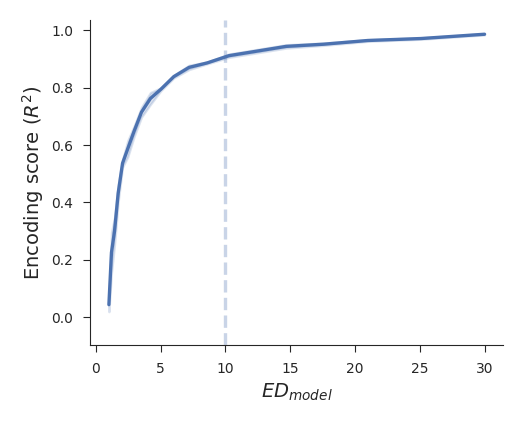

In [5]:
fig, ax = plt.subplots(figsize=(2.5, 2))

sns.lineplot(data=data, x='model_ed', y='r2_ceiled',
             ci='sd', ax=ax)
ax.axvline(sim.eco_ed, linestyle='--', alpha=0.3)

ax.set(xlabel=r'$ED_{model}$', ylabel=r'Encoding score ($R^2$)', ylim=(-0.1, None))

plt.show()

---
# Varying ecological ED

In [21]:
data = []

sim.make_nat_manifold(ed=20)

for eco_ed in tqdm([2, 15, 30]):
    sim.make_eco_manifold(ed=eco_ed, alignment='nat', alignment_strength=0.75)
    sim.make_data_manifold(ed=30)
    
    for model_ed in np.logspace(np.log10(1.01), np.log10(30), num=20):
        sim.make_model_manifold(ed=model_ed, alignment='nat', alignment_strength=.75)
        
        for _ in range(n_repeats):
            sim.sample()
            data.append(sim.encoding_performance())

data = pd.DataFrame(data)

100%|██████████| 3/3 [00:49<00:00, 16.53s/it]


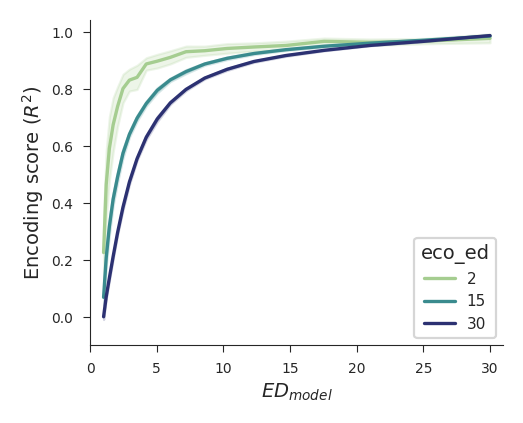

In [37]:
fig, ax = plt.subplots(figsize=(2.5, 2))
cmap = sns.color_palette('crest', as_cmap=True)

sns.lineplot(data=data, x='model_ed', y='r2_ceiled', hue='eco_ed',
             ci='sd', palette=cmap, ax=ax)

ax.set(xlabel=r'$ED_{model}$', ylabel=r'Encoding score ($R^2$)', xlim=(0, 31), ylim=(-0.1, None))

plt.show()

---
# Varying alignment

In [6]:
data = []

sim = EDSimulation(ambient=30, resolution=0.2)
sim.make_nat_manifold(ed=20)
sim.make_eco_manifold(ed=3)
sim.make_data_manifold(ed=30)

for alignment_strength in tqdm([-1, 0, 1]):
    
    for model_ed in np.logspace(np.log10(1.01), np.log10(30), num=20):
        sim.make_model_manifold(ed=model_ed, alignment='eco', alignment_strength=alignment_strength)
        
        for _ in range(n_repeats):
            sim.sample()
            data.append(sim.encoding_performance())

data = pd.DataFrame(data)

100%|██████████| 3/3 [00:12<00:00,  4.15s/it]


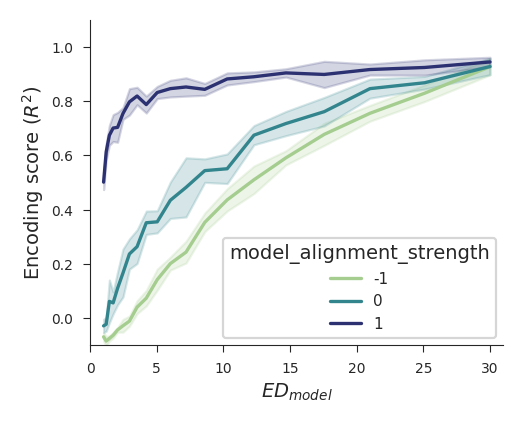

In [7]:
fig, ax = plt.subplots(figsize=(2.5, 2))
cmap = sns.color_palette('crest', as_cmap=True)

sns.lineplot(data=data, x='model_ed', y='r2_ceiled', hue='model_alignment_strength',
             ci='sd', palette=cmap, ax=ax)

ax.set(xlabel=r'$ED_{model}$', ylabel=r'Encoding score ($R^2$)', xlim=(0, 31), ylim=(-0.1, 1.1))

plt.show()